# RNN을 이용한 텍스트 생성

* many-to-one 구조의 RNN을 사용하여 문맥을 반영해서 텍스트를 생성하는 모델을 만들어보자.

## 1. RNN을 이용하여 텍스트 생성하기
* 샘플

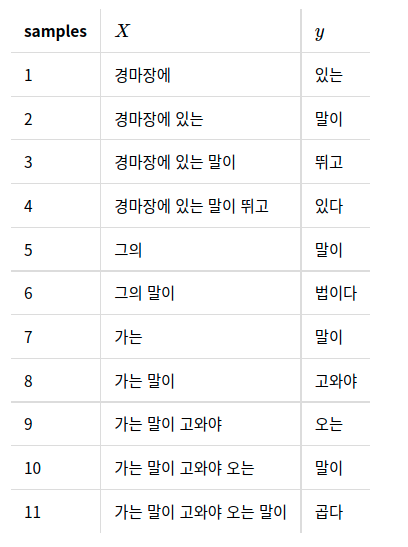


### 1) 데이터에 대한 이해와 전처리

In [209]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

In [210]:
text="""경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

t = Tokenizer()
t.fit_on_texts([text])
vocab_size = len(t.word_index) + 1
# 케라스 토크나이저의 정수 인코딩은 인덱스가 1부터 시작하지만,
# 케라스 원-핫 인코딩에서 배열의 인덱스가 0부터 시작하기 때문에
# 배열의 크기를 실제 단어 집합의 크기보다 +1로 생성해야하므로 미리 +1 선언 
print('단어 집합의 크기 : %d' % vocab_size)
print(t.word_index)

단어 집합의 크기 : 12
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [211]:
sequences = list()
for line in text.split('\n'): # Wn을 기준으로 문장 토큰화
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))
print(sequences)

학습에 사용할 샘플의 개수: 11
[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [212]:
# 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
max_len=max(len(l) for l in sequences)
print(f"샘플의 최대 길이 {max_len}")

샘플의 최대 길이 6


In [213]:
# 전체 샘플의 길이를 6으로 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [214]:
# 각 샘플의 마지막 단어를 레이블로 분리
sequences = np.array(sequences)
x = sequences[:, :-1]
y = sequences[:, -1]
print(f"sequences : \n {sequences}")
print(f"x: \n {x}")
print(f"y: \n {y}")

print(f'x.len: {len(x)}')
print(f'y.len: {len(y)}')
print(f'vocab_size: {vocab_size}')

sequences : 
 [[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]
x: 
 [[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]
y: 
 [ 3  1  4  5  1  7  1  9 10  1 11]
x.len: 11
y.len: 11
vocab_size: 12


In [215]:
# RNN 모델에 훈련 시키기 전에 레이블에 대해서 원-핫 인코딩 수행
y = to_categorical(y, num_classes=vocab_size)
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### 2) 모델 설계하기

* 이제 RNN 모델에 데이터를 훈련시킨다.

In [216]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [217]:
model = Sequential()

# 레이블을 분리하였으므로 이제 x의 길이는 5
model.add(Embedding(input_dim=vocab_size, 
                    output_dim=10,
                    input_length=max_len-1))
model.add(SimpleRNN(units=32))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()
model.fit(x, y, epochs=200, verbose=2)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 5, 10)             120       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                1376      
_________________________________________________________________
dense_14 (Dense)             (None, 12)                396       
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/1 - 1s - loss: 2.4725 - accuracy: 0.0909
Epoch 2/200
1/1 - 0s - loss: 2.4608 - accuracy: 0.0909
Epoch 3/200
1/1 - 0s - loss: 2.4490 - accuracy: 0.1818
Epoch 4/200
1/1 - 0s - loss: 2.4370 - accuracy: 0.1818
Epoch 5/200
1/1 - 0s - loss: 2.4247 - accuracy: 0.1818
Epoch 6/200
1/1 - 0s - loss: 2.4122 - accuracy: 0.2727
Epoch 7/200
1/1 - 0s - loss: 2.3993 - accuracy: 0.2

Epoch 134/200
1/1 - 0s - loss: 0.3379 - accuracy: 0.9091
Epoch 135/200
1/1 - 0s - loss: 0.3310 - accuracy: 0.9091
Epoch 136/200
1/1 - 0s - loss: 0.3243 - accuracy: 0.9091
Epoch 137/200
1/1 - 0s - loss: 0.3177 - accuracy: 0.9091
Epoch 138/200
1/1 - 0s - loss: 0.3112 - accuracy: 1.0000
Epoch 139/200
1/1 - 0s - loss: 0.3048 - accuracy: 1.0000
Epoch 140/200
1/1 - 0s - loss: 0.2986 - accuracy: 1.0000
Epoch 141/200
1/1 - 0s - loss: 0.2925 - accuracy: 1.0000
Epoch 142/200
1/1 - 0s - loss: 0.2865 - accuracy: 1.0000
Epoch 143/200
1/1 - 0s - loss: 0.2807 - accuracy: 1.0000
Epoch 144/200
1/1 - 0s - loss: 0.2749 - accuracy: 1.0000
Epoch 145/200
1/1 - 0s - loss: 0.2693 - accuracy: 1.0000
Epoch 146/200
1/1 - 0s - loss: 0.2638 - accuracy: 1.0000
Epoch 147/200
1/1 - 0s - loss: 0.2584 - accuracy: 1.0000
Epoch 148/200
1/1 - 0s - loss: 0.2531 - accuracy: 1.0000
Epoch 149/200
1/1 - 0s - loss: 0.2480 - accuracy: 1.0000
Epoch 150/200
1/1 - 0s - loss: 0.2429 - accuracy: 1.0000
Epoch 151/200
1/1 - 0s - loss: 

In [218]:
# 모델이 정확하게 예측하고 있는지 문장을 생성하는 함수를 만들어 출력

def sentence_generation(model, tokenizer, curr_word, n_step):
    '''
    model: 모델
    tokenizer: 토크나이저
    curr_word: 현재 단어
    n_step: 반복할 횟수
    '''
    
    # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
    sentence = curr_word
    for _ in range(n_step):
        # 현재 단어에 대한 정수 인코딩
        encoded = t.texts_to_sequences([curr_word])
        
        # 데이터에 대한 패딩
        encoded = pad_sequences(encoded, maxlen=max_len-1, padding='pre')
        
        print(f"정수 인코딩: {curr_word} -> {encoded}")
        
        #입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장
        result = model.predict_classes(encoded, verbose=0)
    
        if result in t.word_index.values():
            # 현재 단어 + ' ' + 예측 단어로 변경
            curr_word = curr_word + ' ' + t.index_word[result[0]]

            # 예측 단어를 문장에 저장
            sentence = sentence + ' ' + t.index_word[result[0]]
        
    return sentence

In [219]:
print(sentence_generation(model, t, '경마장에', 4))

정수 인코딩: 경마장에 -> [[0 0 0 0 2]]
정수 인코딩: 경마장에 있는 -> [[0 0 0 2 3]]


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


정수 인코딩: 경마장에 있는 말이 -> [[0 0 2 3 1]]
정수 인코딩: 경마장에 있는 말이 뛰고 -> [[0 2 3 1 4]]
경마장에 있는 말이 뛰고 있다


In [220]:
print(sentence_generation(model, t, '그의', 2))

정수 인코딩: 그의 -> [[0 0 0 0 6]]
정수 인코딩: 그의 말이 -> [[0 0 0 6 1]]
그의 말이 법이다


In [221]:
print(sentence_generation(model, t, '가는', 5))

정수 인코딩: 가는 -> [[0 0 0 0 8]]
정수 인코딩: 가는 말이 -> [[0 0 0 8 1]]
정수 인코딩: 가는 말이 고와야 -> [[0 0 8 1 9]]
정수 인코딩: 가는 말이 고와야 오는 -> [[ 0  8  1  9 10]]
정수 인코딩: 가는 말이 고와야 오는 말이 -> [[ 8  1  9 10  1]]
가는 말이 고와야 오는 말이 곱다


## 2. LSTM을 이용하여 텍스트 생성하기

* LSTM을 통해 보다 많은 데이터로 텍스트를 생성한다.
* 본질적으로 앞에서 한 것과 동일한 실습이다.

### 1) 데이터에 대한 이해와 전처리

In [222]:
import pandas as pd
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

In [223]:
csv_file_path = '/home/jaehoon/Desktop/AI_Study/times_titles/ArticlesApril2018.csv'
df = pd.read_csv(csv_file_path)
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [224]:
print(f'열의 개수: {len(df.columns)}')
print(df.columns)

열의 개수: 15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [225]:
# headline colum에 NULL 값이 있는지 확인
if 'headline' in df.columns:
    print(df['headline'].isnull().values.any())

False


In [226]:
# 참고 list.append() 와 list.extend()
x = ['tick', 'tock', 'song']
y = ['ping', 'pong']
a = x.copy()

x.append(y)
a.extend(y)

print(x)
print(a, '\n')

# headline 열에서 모든 신문 기사의 제목을 뽑아 하나의 list 로 저장
headline = []
headline.extend(list(df.headline.values))


print(headline[:5])

['tick', 'tock', 'song', ['ping', 'pong']]
['tick', 'tock', 'song', 'ping', 'pong'] 

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell', 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.', 'The New Noma, Explained', 'Unknown', 'Unknown']


In [227]:
print(f"총 샘플의 개수: {len(headline)}")

총 샘플의 개수: 1324


In [228]:
# 'Unknown' 제거
headline = [ data for data in headline if data != 'Unknown']
print(f"노이즈값 제거 후 샘플의 개수: {len(headline)}")

노이즈값 제거 후 샘플의 개수: 1214


In [229]:
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [230]:
# 전처리 수행
# 구두점 제거와 소문자화

print(f"구두점: {punctuation} \n")

def repreprocessing(sentence):
    sentence = sentence.encode('utf8').decode('ascii', 'ignore')
    return ''.join(ch for ch in sentence if ch not in punctuation).lower()

text = [repreprocessing(x) for x in headline]
text[:5]

구두점: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 



['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [231]:
# 단어 집하을 만들고 크기를 확인
t = Tokenizer()
t.fit_on_texts(text)
vocab_size = len(t.word_index) + 1
print(f"단어 집합의 크기: {vocab_size}")

단어 집합의 크기: 3494


In [232]:
# 정수 인코딩과 동시에 문장을 여러줄로 분해하여 훈련 데이터 구성

sequences = list()

for line in text:
    encoded = t.texts_to_sequences([line])[0]
    for idx in range(1, len(encoded)):
        sequence = encoded[:idx+1]
        sequences.append(sequence)
        
sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [234]:
print(f"빈도수 상위 582번 단어: {t.index_word[582]}")
print(f"\'offer\'의 Key: {t.word_index['offer']}")

빈도수 상위 582번 단어: offer
'offer'의 Key: 582


In [235]:
# 최대 샘플의 길이로 각 sequence를 padding

max_len=max(len(l) for l in sequences)
print(f"최대 샘플의 길이: {max_len} \n")

sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

최대 샘플의 길이: 24 

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [236]:
# 맨 우측 단어만 label로 분리
sequences = np.array(sequences)

X = sequences[:, :-1]
y = sequences[:, -1]

print(f"vocab_size: {vocab_size}")
print(f"X.len: {len(X)}")
print(f"y.len: {len(y)}")

print(X[:3])
print(y[:3])

vocab_size: 3494
X.len: 7803
y.len: 7803
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]
[ 269  371 1115]


In [237]:
y = to_categorical(y, num_classes=vocab_size)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 2) 모델 설계하기

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [238]:
model = Sequential()

model.add(Embedding(vocab_size, 10, input_length=max_len-1))
model.add(LSTM(128))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

model.summary()

Epoch 1/200
244/244 - 6s - loss: 7.6665 - accuracy: 0.0302
Epoch 2/200
244/244 - 5s - loss: 7.1169 - accuracy: 0.0282
Epoch 3/200
244/244 - 5s - loss: 6.9885 - accuracy: 0.0313
Epoch 4/200
244/244 - 5s - loss: 6.8749 - accuracy: 0.0420
Epoch 5/200
244/244 - 5s - loss: 6.7389 - accuracy: 0.0446
Epoch 6/200
244/244 - 5s - loss: 6.5865 - accuracy: 0.0455
Epoch 7/200
244/244 - 5s - loss: 6.5011 - accuracy: 0.0473
Epoch 8/200
244/244 - 5s - loss: 6.2620 - accuracy: 0.0549
Epoch 9/200
244/244 - 5s - loss: 6.0824 - accuracy: 0.0607
Epoch 10/200
244/244 - 5s - loss: 5.9090 - accuracy: 0.0610
Epoch 11/200
244/244 - 5s - loss: 5.7386 - accuracy: 0.0675
Epoch 12/200
244/244 - 5s - loss: 5.5798 - accuracy: 0.0711
Epoch 13/200
244/244 - 5s - loss: 5.4276 - accuracy: 0.0751
Epoch 14/200
244/244 - 5s - loss: 5.2790 - accuracy: 0.0825
Epoch 15/200
244/244 - 5s - loss: 5.1378 - accuracy: 0.0871
Epoch 16/200
244/244 - 5s - loss: 5.0011 - accuracy: 0.0939
Epoch 17/200
244/244 - 5s - loss: 4.8668 - accura

244/244 - 5s - loss: 0.3337 - accuracy: 0.9150
Epoch 138/200
244/244 - 4s - loss: 0.3315 - accuracy: 0.9149
Epoch 139/200
244/244 - 4s - loss: 0.3290 - accuracy: 0.9153
Epoch 140/200
244/244 - 4s - loss: 0.3238 - accuracy: 0.9154
Epoch 141/200
244/244 - 5s - loss: 0.3246 - accuracy: 0.9179
Epoch 142/200
244/244 - 5s - loss: 0.3193 - accuracy: 0.9143
Epoch 143/200
244/244 - 4s - loss: 0.3145 - accuracy: 0.9155
Epoch 144/200
244/244 - 4s - loss: 0.3124 - accuracy: 0.9154
Epoch 145/200
244/244 - 5s - loss: 0.3103 - accuracy: 0.9168
Epoch 146/200
244/244 - 4s - loss: 0.3091 - accuracy: 0.9161
Epoch 147/200
244/244 - 5s - loss: 0.3058 - accuracy: 0.9155
Epoch 148/200
244/244 - 5s - loss: 0.3042 - accuracy: 0.9173
Epoch 149/200
244/244 - 4s - loss: 0.3041 - accuracy: 0.9157
Epoch 150/200
244/244 - 4s - loss: 0.3132 - accuracy: 0.9157
Epoch 151/200
244/244 - 4s - loss: 0.3197 - accuracy: 0.9148
Epoch 152/200
244/244 - 5s - loss: 0.3271 - accuracy: 0.9114
Epoch 153/200
244/244 - 4s - loss: 0.3

In [260]:
# 문장을 생성하는 함수

def sentence_generation(model, tokenizer, curr_word, n_step):
    retValue = curr_word
    
    for _ in range(n_step):
        encoded = tokenizer.texts_to_sequences([curr_word])
        encoded = pad_sequences(encoded, maxlen=max_len-1, padding='pre')
        result = model.predict_classes(encoded, verbose=0)
        result = result[0]
        
        if result in tokenizer.index_word:
            curr_word = curr_word + ' ' + tokenizer.index_word[result]
            retValue = retValue + ' ' + tokenizer.index_word[result]
            
    return retValue

In [261]:
print(sentence_generation(model, t, 'i', 10))

i want to be rich and im not sorry are hes


In [262]:
print(sentence_generation(model, t, 'how', 10))

how to make facebook more accountable more beat will still still
